# Module 1: Build a discrete ocean

The objective: understand the basics behind eddies.mit.edu

## We will learn:

- what is an Ocean model?
- How do we build a grid in Oceananigans.jl
- Discretize continents into a discretized ocean

In this module we will learn to

- discretize the ocean in a discrete grid
- visualize the grid using Makie

In [ ]:
using Pkg
Pkg.add(url="https://github.com/CliMA/Oceananigans.jl", rev="ss/particle_tracker");
Pkg.add(["DataDeps", "KernelAbstractions", "JLD2", "PyPlot"]);

using Oceananigans, DataDeps, JLD2, PyPlot

Now we can set up a grid

In [ ]:
include("usefull_functions.jl")

Now we have to download the bathymetry

In [ ]:
onlinepath = "https://github.com/CliMA/OceananigansArtifacts.jl/raw/ss/new_hydrostatic_data_after_cleared_bugs/quarter_degree_near_global_input_data/"

dh = DataDep("quarter_degree_near_global_lat_lon",
     "Forcing data for global latitude longitude simulation",
     onlinepath * "bathymetry-1440x600.jld2"
)

DataDeps.register(dh)

datadep"quarter_degree_near_global_lat_lon"
file_bathymetry = jldopen(@datadep_str "quarter_degree_near_global_lat_lon/bathymetry-1440x600.jld2")

bathymetry = file_bathymetry["bathymetry"]

Let's plot our continents to see the shape

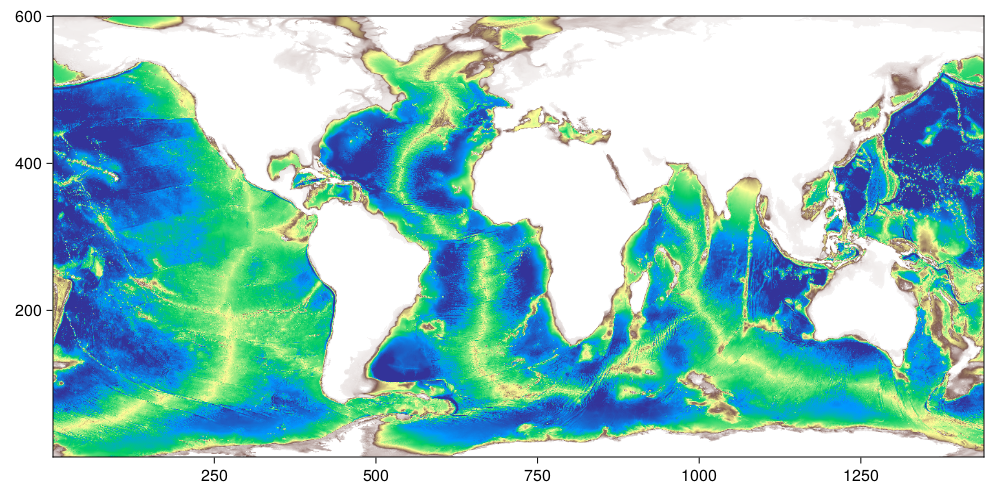

In [10]:
fig = Figure(resolution = (1000, 500))
ax  = Axis(fig[1, 1])

heatmap!(ax, bathymetry, colorrange = (-5500, 100), colormap = :terrain)

current_figure()

Now we can create a grid. Ocean modeling means bla bla bla...

In [1]:
Nx = 100
Ny = 50

underlying_grid = LatitudeLongitudeGrid(size = (Nx, Ny, 1),
                                        longitude = (-180, 180),
                                        latitude = (-75, 75),
                                        halo = (4, 4, 4),
                                        z = (0, 1))

grid = immersed_boundary_grid(underlying_grid, bathymetry);

LoadError: UndefVarError: LatitudeLongitudeGrid not defined

Now let's see our grid...

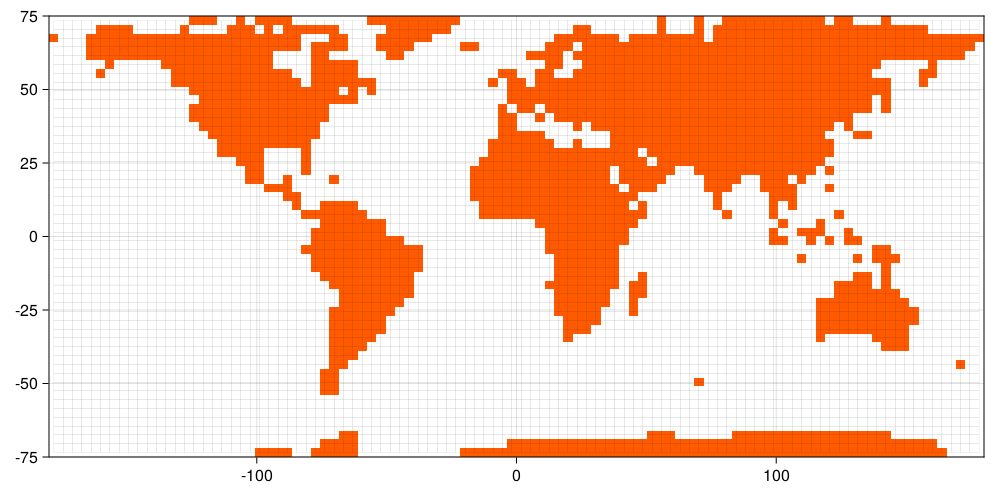

In [16]:
fig = visualize_cartesian_grid(grid)
current_figure()

The important elements of a grid are...